## Theoretical Background

To find ground state energy of a physics system, always remember to start by solving its Schrodinger Equation. Schrodinger Equation for Hydrogen atom (system with a proton and an electron only) written as follows:
$$\left[ -\frac{\hbar^2}{2m}\nabla^2-\frac{e^2}{4\pi\epsilon_0 r} \right] \psi(\mathbf{r}) = E\psi(\mathbf{r})$$

To make it simpler computationally, it is often to change Schrodinger equation in atomic units, as follows:
$$\left[ -\frac{1}{2}\nabla^2-\frac{1}{r} \right] \psi(\mathbf{r}) = E\psi(\mathbf{r})$$
with energy stated in Hartree units (1 Hartree = 27.212 eV = $4.359 x 10^{-18}$ Joule).

To solve this problem, do bra operation to both sides of the equation.
$$\left\langle \psi(\mathbf{r}) \left| -\frac{1}{2}\nabla^2-\frac{1}{r} \right| \psi(\mathbf{r}) \right\rangle = \left\langle \psi(\mathbf{r}) \left| E \right| \psi(\mathbf{r}) \right\rangle$$
$$\left\langle \psi(\mathbf{r}) \left| -\frac{1}{2}\nabla^2 \right| \psi(\mathbf{r}) \right\rangle + 
\left\langle \psi(\mathbf{r}) \left| -\frac{1}{r} \right| \psi(\mathbf{r}) \right\rangle = \left\langle \psi(\mathbf{r}) \left| E \right| \psi(\mathbf{r}) \right\rangle$$

Take out all constants as follows:
$$-\frac{1}{2} \left\langle \psi(\mathbf{r}) \left| \nabla^2 \right| \psi(\mathbf{r}) \right\rangle - 
\left\langle \psi(\mathbf{r}) \left| \frac{1}{r} \right| \psi(\mathbf{r}) \right\rangle = E \left\langle \psi(\mathbf{r}) | \psi(\mathbf{r}) \right\rangle$$

Approximate the wave equation with Gaussian Basis Set, $\psi(\mathbf{r}) = \sum_{p}\mathrm{C}_{p}\mathrm{e}^{-\alpha_{p}\mathrm{\mathbf{r}}^{2}}$, so above equation can be written as problem of integration over volume as follows:
$$-\frac{1}{2} \int \nabla^2 \sum_{p}(\mathrm{C}_{p}\mathrm{e}^{-\alpha_{p}\mathrm{\mathbf{r}}^{2}}) \sum_{q}(\mathrm{C}_{q}\mathrm{e}^{-\alpha_{q}\mathrm{\mathbf{r}}^{2}}) d^{3}\mathbf{r} - 
\int \frac{1}{r} \sum_{p}(\mathrm{C}_{p}\mathrm{e}^{-\alpha_{p}\mathrm{\mathbf{r}}^{2}}) \sum_{q}(\mathrm{C}_{q}\mathrm{e}^{-\alpha_{q}\mathrm{\mathbf{r}}^{2}}) d^{3}\mathbf{r} = E \int \sum_{p}(\mathrm{C}_{p}\mathrm{e}^{-\alpha_{p}\mathrm{\mathbf{r}}^{2}}) \sum_{q}(\mathrm{C}_{q}\mathrm{e}^{-\alpha_{q}\mathrm{\mathbf{r}}^{2}}) d^{3}\mathbf{r}$$
$$\sum_{p,q}\mathrm{C}_{p}\mathrm{C}_{q} \left[ -\frac{1}{2} \int \mathrm{e}^{-\alpha_{p}\mathrm{\mathbf{r}}^{2}} \nabla^2 \mathrm{e}^{-\alpha_{q}\mathrm{\mathbf{r}}^{2}} d^{3}\mathbf{r} - 
\int \mathrm{e}^{-\alpha_{p}\mathrm{\mathbf{r}}^{2}} \frac{1}{r} \mathrm{e}^{-\alpha_{q}\mathrm{\mathbf{r}}^{2}} d^{3}\mathbf{r} \right] = E \sum_{p,q} \mathrm{C}_{p}\mathrm{C}_{q} \int \mathrm{e}^{-\alpha_{p}\mathrm{\mathbf{r}}^{2}} \mathrm{e}^{-\alpha_{q}\mathrm{\mathbf{r}}^{2}} d^{3}\mathbf{r}$$

From our book reference, those three form of integration problems have already solved, so equation can also be written as follows:
$$\sum_{p,q}\mathrm{C}_{p}\mathrm{C}_{q} \left[ 3\frac{\alpha_{p}\alpha_{q}\pi^{\frac{3}{2}}}{(\alpha_{p} + \alpha_{q})^\frac{5}{2}} - 
\frac{2\pi}{\alpha_{p} + \alpha_{q}} \right] = E \sum_{p,q} \mathrm{C}_{p}\mathrm{C}_{q} \left( \frac{\pi}{\alpha_{p} + \alpha_{q}} \right)^{\frac{3}{2}}$$

Equation above can be written as matrix problem as follows:
$$ \mathbf{F}\mathbf{C} = E\mathbf{S}\mathbf{C} $$
with $\mathbf{F}$ called as Fock Matrix (for Hydrogen atom that only has an electron, Fock matrix will be as same as Hamiltonian matrix), $\mathbf{S}$ called as Overlap Matrix, and their components can be found with
$$ F_{pq} = 3\frac{\alpha_{p}\alpha_{q}\pi^{\frac{3}{2}}}{(\alpha_{p} + \alpha_{q})^\frac{5}{2}} - 
\frac{2\pi}{\alpha_{p} + \alpha_{q}} $$
$$ S_{pq} = \left( \frac{\pi}{\alpha_{p} + \alpha_{q}} \right)^{\frac{3}{2}} $$

Until this point, we've came to a Generalized Eigenvalue Problem with energy as the eigenvalue and $\mathbf{C}$ as the eigenvector. By found the eigenvector, we can construct approximation of the wave function of hydrogen atom on ground-state. This code script can be used to solve this generalized eigenvalue problem.

## Library

In [1]:
import math
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt

## Predefined Functions

$$ F_{pq} = 3\frac{\alpha_{p}\alpha_{q}\pi^{\frac{3}{2}}}{(\alpha_{p} + \alpha_{q})^\frac{5}{2}} - 
\frac{2\pi}{\alpha_{p} + \alpha_{q}} $$

In [2]:
def fock_element(alpha_p: float, alpha_q: float) -> float:
  """
  Calculate Fock matrix's element for row p and column q.

  :param alpha_p: (float) Alpha p value.
  :param alpha_q: (float) Alpha q value.

  :return (float) Element of fock matrix for row p and column q.
  """
  kinetics_part = (3*alpha_p*alpha_q*((math.pi)**(3/2))) / ((alpha_p + alpha_q)**(5/2))
  potential_part = (2*math.pi) / (alpha_p + alpha_q)
  fock_element = kinetics_part - potential_part
  return fock_element

$$ S_{pq} = \left( \frac{\pi}{\alpha_{p} + \alpha_{q}} \right)^{\frac{3}{2}} $$

In [3]:
def overlap_element(alpha_p: float, alpha_q: float) -> float:
  """
  Calculate Overlap matrix's element for row p and column q.

  :param alpha_p: (float) Alpha p value.
  :param alpha_q: (float) Alpha q value.

  :return (float) Element of fock matrix for row p and column q.
  """
  overlap_element = (math.pi/(alpha_p + alpha_q))**(3/2)
  return overlap_element

In [4]:
def SCF(alpha: list) -> tuple([float, list]):
  """
  SCF procedure to solve ground-state energy and wave function of Hydrogen atom.

  :param alpha: (list) Alpha variables used to solve generalize eigenvalue problem.

  :return: (float) Energy value calculated from solving the generalize eigenvalue problem.
  :return: (list) Gaussian coefficients for the wave equation.
  ===============================
  1. Declare total alpha used for the problem.
  2. Declare initial structure of fock and overlap matrix.
  3. Calculate fock and overlap matrix's element row by row, column by column
  4. Solve generalized eigenvalue problem.
  5. Take minimal value from possible energies as ground-state energy is the lowest possible energy for system.
  6. Take eigenvector related with eigenvalue taken above as coefficient for the ground-state wave function. 
  """
  n_alpha = len(alpha)
  fock_matrix = np.zeros(shape = (n_alpha, n_alpha))
  overlap_matrix = np.zeros(shape = (n_alpha, n_alpha))

  for p in range(n_alpha):
    for q in range(n_alpha):
      fock_matrix[p][q] = fock_element(alpha[p], alpha[q])
      overlap_matrix[p][q] = overlap_element(alpha[p], alpha[q])
      
  energy_values, coefficient_matrix = eigh(fock_matrix, overlap_matrix)
  for index, energy in enumerate(energy_values):
    if energy == min(energy_values):
      ground_energy = energy
      ground_coefficient = coefficient_matrix[:, index]

  return ground_energy, ground_coefficient

## Main
We will use 4 gaussian functions as approximation of the wave function. <br>
From the book reference, 4 alpha variables are $\alpha_{1} = 13.00773$, $\alpha_{2} = 1.962079$, $\alpha_{3} = 0.444529$, and $\alpha_{4} = 0.1219492$. <br>
After that, we will count error of the energy value relative to the actual one. Actual value of ground-state energy of Hydrogen atom is -0.5 Hartree.

In [5]:
actual_energy = -0.5
alpha_matrix = [13.00773, 1.962079, 0.444529, 0.1219492]

exp_energy, coefficient = SCF(alpha_matrix)
percent_of_error = abs((actual_energy - exp_energy) / actual_energy) * 100

print(f"Calculated ground-state energy for Hydrogen atom = {round(exp_energy, 6)} Hartree.")
print(f"Percent of error from calculation result relative to the actual one = {round(percent_of_error, 4)}%")
print(f"Coefficient: {coefficient}")

Calculated ground-state energy for Hydrogen atom = -0.499278 Hartree.
Percent of error from calculation result relative to the actual one = 0.1443%
Coefficient: [-0.09610152 -0.16301717 -0.18558699 -0.07370076]


From coefficient above, we can write the ground-state wave function of the hydrogen atom as follows:
$$\psi(\mathbf{r}) = -0.09610152\mathrm{e}^{-13.00773\mathrm{r}^{2}} -0.16301717\mathrm{e}^{-1.962079\mathrm{r}^{2}} -0.18558699\mathrm{e}^{-0.444529\mathrm{r}^{2}} -0.07370076\mathrm{e}^{-0.1219492\mathrm{r}^{2}} 
$$

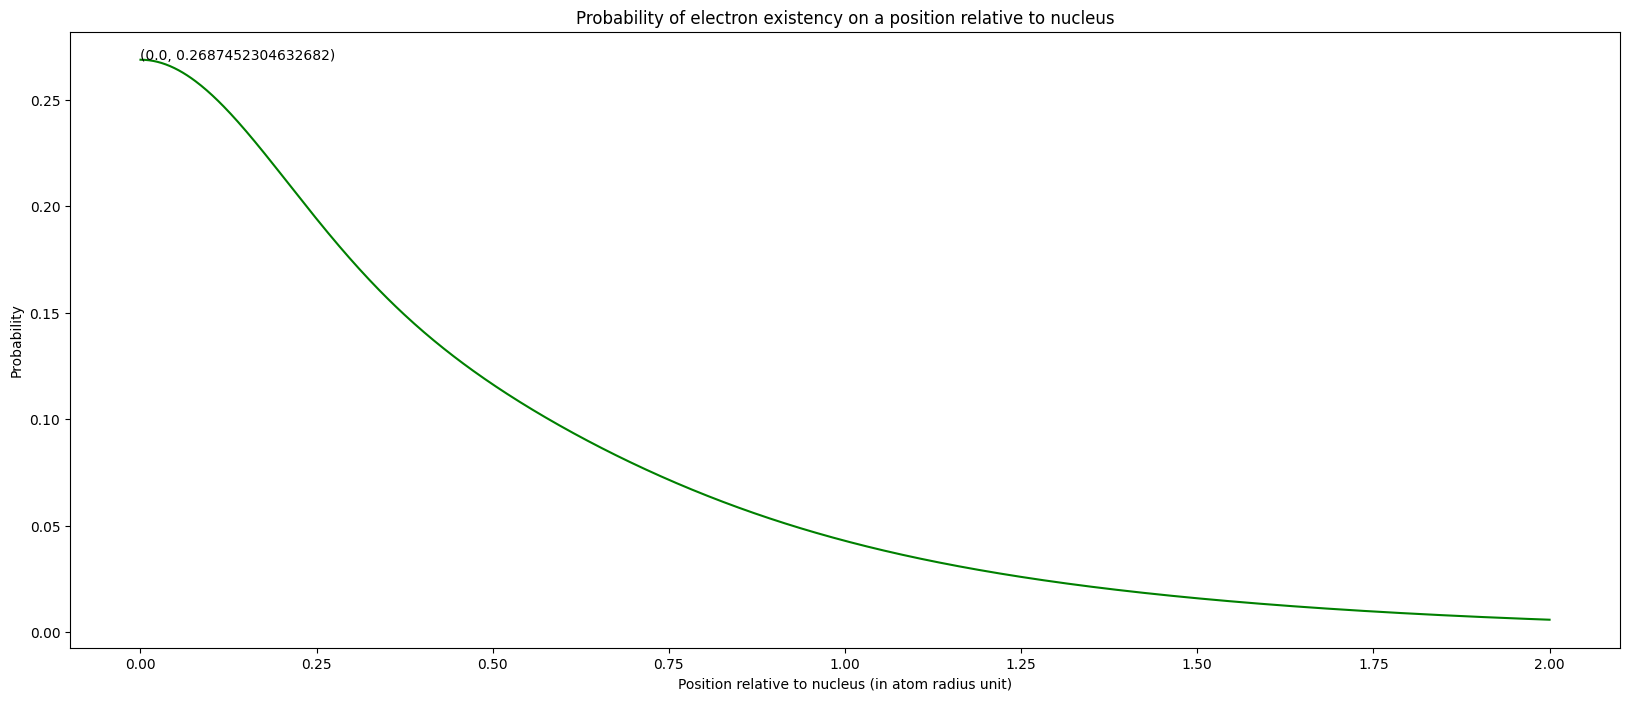

In [6]:
x_axis = np.linspace(0, 2, 1000)
probability = np.zeros_like(x_axis)

def psi_value(r):
  psi = 0
  for i in range(len(coefficient)):
    psi += coefficient[i] * math.e**(-alpha_matrix[i] * r * r)
  return psi

for i, r in enumerate(x_axis):
  psi = psi_value(r)
  probability[i] = psi ** 2

fig, ax = plt.subplots(figsize=(20,8)) 
ax.plot(x_axis, probability, color='green')
for xy in zip(x_axis, probability):
  if xy[1] == max(probability):
    ax.annotate('(%s, %s)' % xy, xy=xy)
    break
plt.title("Probability of electron existency on a position relative to nucleus")
plt.xlabel("Position relative to nucleus (in atom radius unit)")
plt.ylabel("Probability")
plt.show()